# BigMart Sales Prediction

- I need to analyse the dataset and come up with more insights and our main objective is to predict the Sales figure
-I have to build a solution that should able to predict the sales of then different stores of Big Mart according to the provided dataset.

## Approach
- 1) By applying Exploratory Data Analysis i will identify the relation between different attributes and evaluate meaningful information.
-2) By applying different supervised machine learning algorithms I will predict the sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score



In [2]:
df_train = pd.read_csv(r'C:\Users\PRATIK\Documents\jupyter Notebook\PROJECT-New lappy\BigMart Sales Analysis\Train.csv')
df_test = pd.read_csv(r'C:\Users\PRATIK\Documents\jupyter Notebook\PROJECT-New lappy\BigMart Sales Analysis\Test.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
print("Training set-: \n")
print(df_train.info())
print("\nTesting set-: \n")
print(df_test.info())

Training set-: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

Testing set-: 

<class

In [7]:
#sns.pairplot(df_train)

### Dealing with missing data

In [8]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
# columns with null values
df_train.columns[df_train.isnull().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

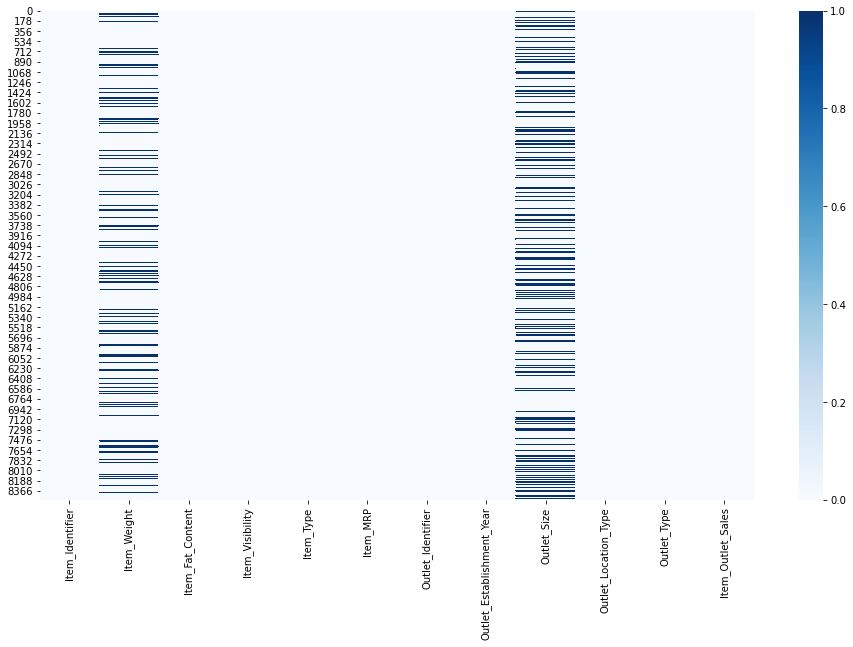

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df_train.isnull(), cmap='Blues')
plt.show()

- There are missing values in Item_Weight & Outlet_size

<AxesSubplot:xlabel='Item_Weight'>

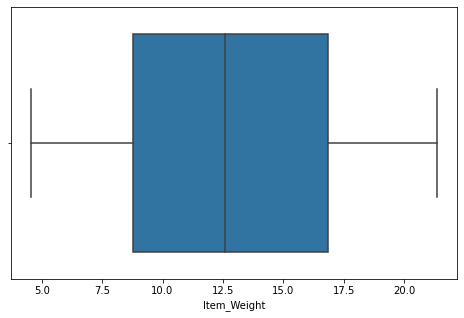

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=df_train)

- boxplot dont have any outlier and hence I can change missing values with 'Mean'.

In [13]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

Since the Outlet_Size is a categorial variable I can change this missing values with "Mode"(i.e. Most Repeated Value)

In [14]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [15]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

In [16]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
print("Training set-: \n")
print(df_train.info())
print("\n Testing set-: \n")
print(df_test.info())

Training set-: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

 Testing set-: 

<clas

In [18]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
# selecting required features
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [20]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
#import dtale

In [22]:
#dtale.show(df_train)

In [23]:
#from pandas_profiling import ProfileReport

In [24]:
#profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [25]:
#profile

In [26]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'], inplace=True)

In [28]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

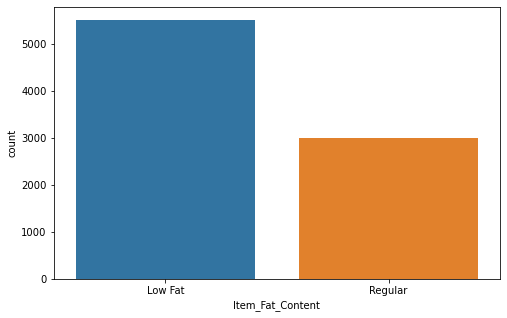

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='Item_Fat_Content',data=df_train)


- from above count plot I observed, people bought more Low Fat Items.

In [30]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

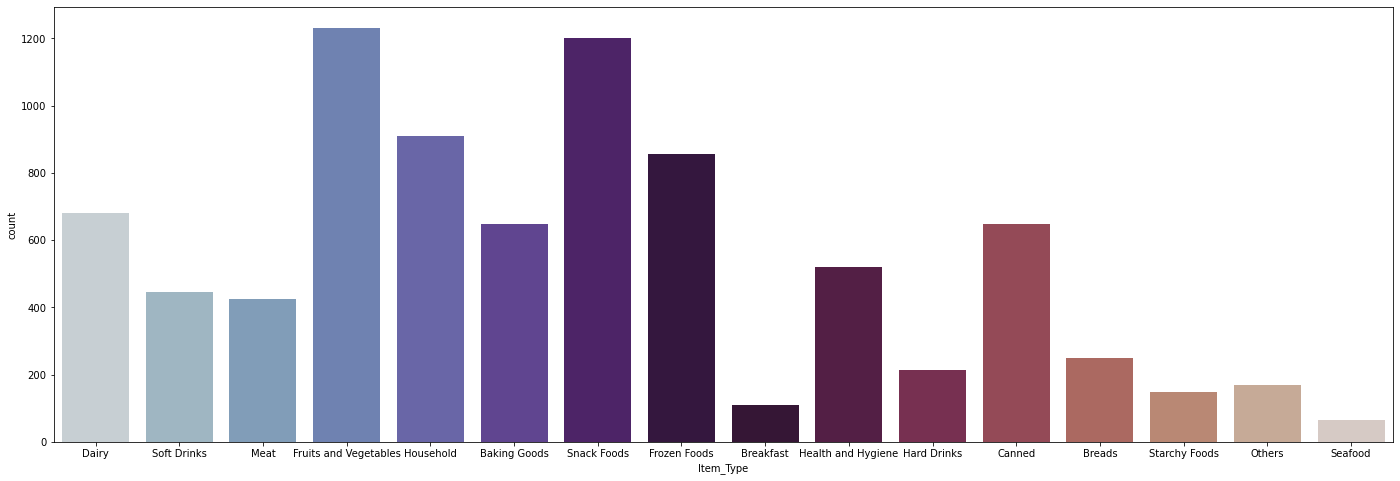

In [31]:
plt.figure(figsize=(24,8))
sns.countplot(x='Item_Type',data=df_train, palette='twilight')

- People bought more Fruits and Vegetables

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

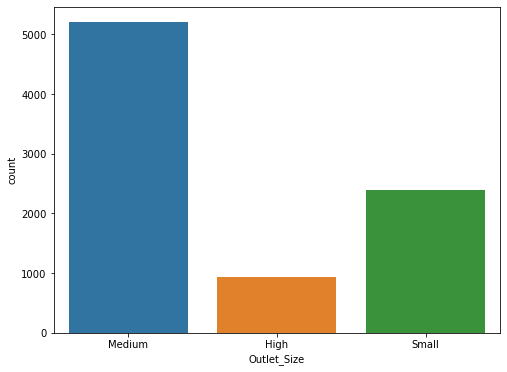

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_train, x='Outlet_Size')

- I have more medium Outlet

In [33]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

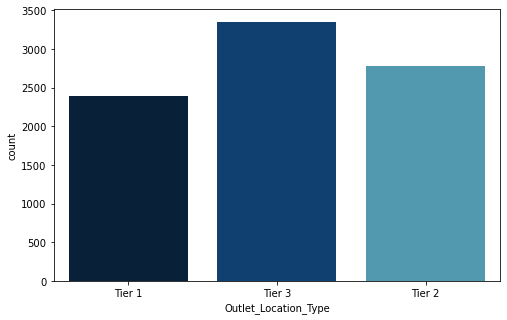

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_train, x='Outlet_Location_Type', palette='ocean')

-  Maximum outlets in Tier 3 cities

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

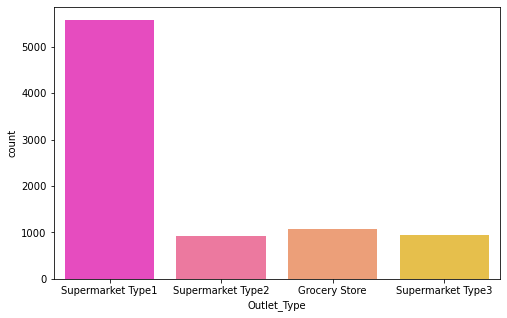

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_train, x='Outlet_Type', palette='spring')

- Maximum supermarket are of Type 1

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

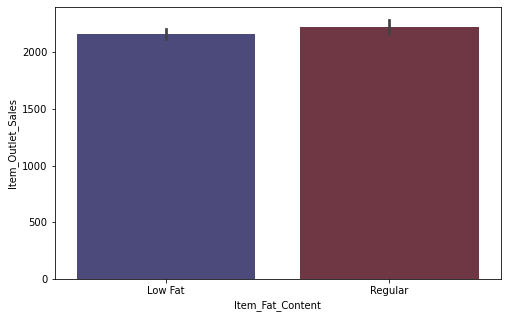

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df_train,palette='icefire')

-  Low Fat and Regular both are contributing equally to the revenue generation

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

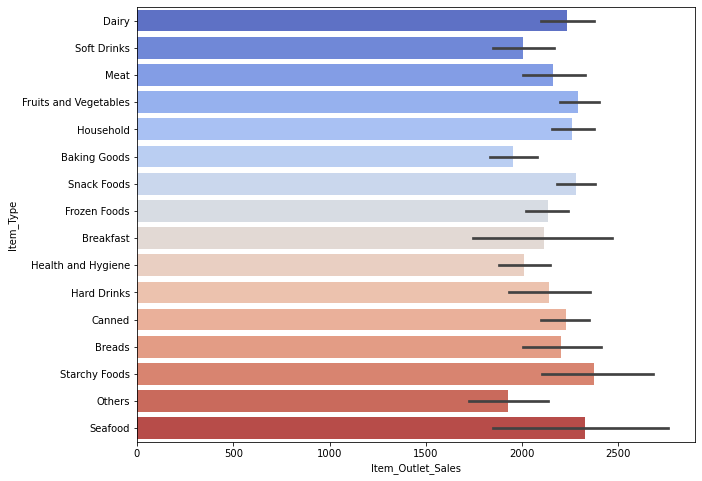

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df_train,palette='coolwarm')

- Although Fruits and Vegetables unit sold are high, however revenue generated by Seafood is much higher, so we have to focus more on such products.

### 4) Item MRP to Item_Outlet_Sales

Text(0, 0.5, 'Item Outlet Sales')

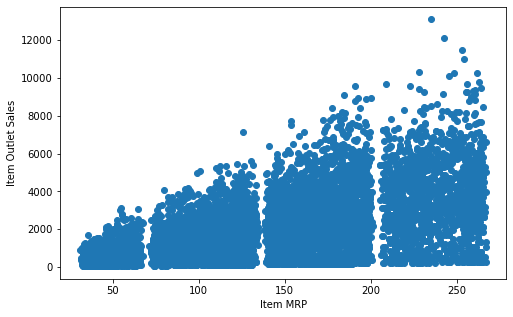

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=df_train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

- Above scatter plot show that the Items with higher MRP are sold maximum

### Outlet Size to Item Outlet Sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

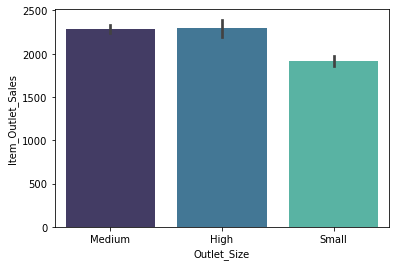

In [39]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df_train,palette='mako')

- Medium and High size outlet generate maximun Revenue.

### Outlet Location to Item Outlet Sales 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

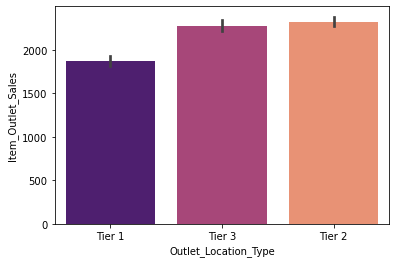

In [40]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df_train,palette='magma')

<AxesSubplot:>

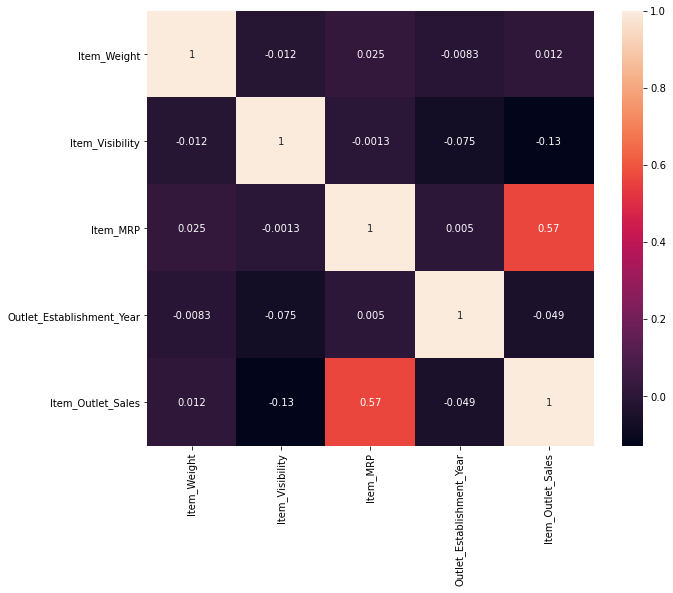

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), annot=True, cmap='rocket')

# Label Encoding

In [42]:
df_train_cat = df_train.select_dtypes(object)
df_train_num = df_train.select_dtypes(["int64", "float64"])

In [43]:
df_train_cat

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


In [44]:
df_train_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [45]:
for col in df_train_cat:
    le = LabelEncoder()
    df_train_cat[col] = le.fit_transform(df_train_cat[col])     

In [46]:
df_train_cat

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,4,1,0,1
1,1,14,1,2,2
2,0,10,1,0,1
3,1,6,1,2,0
4,0,9,0,2,1
...,...,...,...,...,...
8518,0,13,0,2,1
8519,1,0,1,1,1
8520,0,8,2,1,1
8521,1,13,1,2,2


In [47]:
df_train = pd.concat([df_train_cat, df_train_num], axis=1)

In [48]:
df_train

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0,4,1,0,1,9.300,0.016047,249.8092,1999,3735.1380
1,1,14,1,2,2,5.920,0.019278,48.2692,2009,443.4228
2,0,10,1,0,1,17.500,0.016760,141.6180,1999,2097.2700
3,1,6,1,2,0,19.200,0.000000,182.0950,1998,732.3800
4,0,9,0,2,1,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,0,13,0,2,1,6.865,0.056783,214.5218,1987,2778.3834
8519,1,0,1,1,1,8.380,0.046982,108.1570,2002,549.2850
8520,0,8,2,1,1,10.600,0.035186,85.1224,2004,1193.1136
8521,1,13,1,2,2,7.210,0.145221,103.1332,2009,1845.5976


In [49]:
#df_train = pd.get_dummies(df_train, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [50]:
#df_train

# splitting dataset

In [51]:
x=df_train.drop('Item_Outlet_Sales',axis=1)
y=df_train['Item_Outlet_Sales']

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=101)

In [53]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [54]:
x_train= sc.fit_transform(xtrain)

In [55]:
x_test= sc.transform(xtest)

In [56]:
x_train

array([[ 1.36005691,  1.37390124, -1.95454738, ...,  0.01470214,
         1.90557037, -1.28780093],
       [-0.73526335, -0.76450926, -0.28652777, ...,  1.54505143,
        -0.73855181,  0.02704034],
       [-0.73526335,  0.42349657,  1.38149183, ...,  0.04831037,
        -0.21696077, -1.52686298],
       ...,
       [-0.73526335,  0.18589541,  1.38149183, ..., -0.91973848,
        -0.71774705, -0.09249068],
       [ 1.36005691, -1.71491392, -0.28652777, ...,  1.21713989,
         1.37013729,  1.10281956],
       [-0.73526335,  0.42349657, -0.28652777, ...,  1.8438611 ,
        -1.34606229,  1.34188161]])

In [57]:
x_test

array([[-0.73526335,  0.18589541, -0.28652777, ..., -0.21532196,
        -0.66006011,  1.34188161],
       [-0.73526335,  1.37390124, -1.95454738, ..., -0.52926424,
         0.11456195, -1.28780093],
       [ 1.36005691, -1.47731276,  1.38149183, ...,  0.16426975,
        -1.02466774, -0.09249068],
       ...,
       [ 1.36005691,  1.6115024 ,  1.38149183, ..., -0.41291842,
         0.55656444,  0.74422649],
       [ 1.36005691, -0.52690809,  1.38149183, ...,  0.40729943,
        -0.58477555, -0.09249068],
       [ 1.36005691,  0.66109774, -0.28652777, ..., -0.89135051,
        -0.69584545, -1.52686298]])

In [58]:
ytrain

5274    5424.9384
2697     193.0820
1976     254.3356
5139     988.0472
8073    1031.9900
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6392, dtype: float64

In [59]:
ytest

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
4292    3782.4098
4130     327.5736
5633    1225.7378
2541    2090.6120
6985    2777.7176
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

In [60]:
linreg = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [61]:
def mymodel(model):
    model.fit(x_train, ytrain)
    ypred = model.predict(x_test)
    print(f"MAE -: {MAE(ytest, ypred)}")
    print(f"MSE -: {MSE(ytest, ypred)}")
    print(f"RMSE -: {np.sqrt(MSE(ytest, ypred))}")
    print(f"R-Squared -: {r2_score(ytest, ypred)}")

In [62]:
mymodel(linreg)

MAE -: 871.6015305892643
MSE -: 1326757.8379562118
RMSE -: 1151.8497462586913
R-Squared -: 0.5115359787413831


In [63]:
mymodel(rf)

MAE -: 777.2484025959644
MSE -: 1217678.285281935
RMSE -: 1103.484610351198
R-Squared -: 0.5516951060606874


In [64]:
mymodel(xgb)

MAE -: 801.2862692881889
MSE -: 1267060.9425481034
RMSE -: 1125.6380157706576
R-Squared -: 0.5335142062321048


# Hyperparameter Tunning

In [65]:
from sklearn.linear_model import Ridge, Lasso

In [66]:
# Ridge
l2 = Ridge(alpha=5)
l2.fit(xtrain, ytrain)
ypred = l2.predict(xtest)
print(r2_score(ytest, ypred))

0.5120263784238219


In [67]:
# Lasso
l1 = Lasso(alpha=4)
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)
print(r2_score(ytest, ypred))

0.511472789481354


In [68]:
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain, ytrain)
    print(f"{i} -: {l2.score(xtest, ytest)}")

0 -: 0.5115359787413831
1 -: 0.5116855360583827
2 -: 0.5118029273293214
3 -: 0.5118954703388017
4 -: 0.5119685927043227
5 -: 0.5120263784238219
6 -: 0.5120719403020728
7 -: 0.5121076785284212
8 -: 0.5121354632674672
9 -: 0.51215676558141
10 -: 0.5121727526218562
11 -: 0.5121843577293528
12 -: 0.5121923326613619
13 -: 0.512197286925538
14 -: 0.5121997176973901
15 -: 0.5122000327863336
16 -: 0.512198568416437
17 -: 0.5121956031023212
18 -: 0.5121913685582211
19 -: 0.5121860583340919
20 -: 0.5121798346967612
21 -: 0.5121728341461592
22 -: 0.5121651718626671
23 -: 0.5121569453119971
24 -: 0.5121482371820036
25 -: 0.5121391177866688
26 -: 0.5121296470428098
27 -: 0.5121198761023862
28 -: 0.51210984870584
29 -: 0.5120996023084371
30 -: 0.5120891690210695
31 -: 0.5120785763987797
32 -: 0.5120678481038017
33 -: 0.5120570044648094
34 -: 0.5120460629499997
35 -: 0.5120350385684009
36 -: 0.5120239442111929
37 -: 0.5120127909427323
38 -: 0.5120015882492877
39 -: 0.5119903442521061
40 -: 0.51197906

In [69]:
# Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
cvs = cross_val_score(linreg, x,y, cv=8)

In [72]:
cvs

array([0.51750168, 0.53462285, 0.49288489, 0.47339867, 0.51295631,
       0.51854924, 0.49725263, 0.49743704])

In [73]:
cvs.mean()

0.5055754129210543

### Random Forest

In [74]:
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=4, random_state=101)

In [75]:
mymodel(rf)

MAE -: 741.3078379520498
MSE -: 1087979.6258027053
RMSE -: 1043.0626183517006
R-Squared -: 0.5994454392026178


In [76]:
# XGBoost
xgb = XGBRegressor(n_estimators=200, booster='gblinear',n_jobs=4, random_state=101)

In [77]:
mymodel(xgb)

MAE -: 871.6015160197264
MSE -: 1326757.8106458376
RMSE -: 1151.8497344036841
R-Squared -: 0.5115359887960703


# Conclusion

# Observation:-
- 1) XGBoost Regressor and Random Forest are best performing Models, we can use both to check on test data set and find out which perform better.
- 2) MRP has huge correlation with the Outlet Sales.
- 3) The products or Items with highest/greater MRP are sold maximum.
- 4) Low Fat and Regular both are equally generate more revenue.
- 5) Although Fruits and Vegetables unit sold are high, but revenue generated by Seafood is much higher, so we have to focus more on such products.

# Save model

In [78]:
import joblib

In [79]:
joblib.dump(RandomForestRegressor,r'C:\Users\PRATIK\Documents\jupyter Notebook\PROJECT-New lappy\BigMart Sales Analysis\Models\RandomForestRegressor.sav')

['C:\\Users\\PRATIK\\Documents\\jupyter Notebook\\PROJECT-New lappy\\BigMart Sales Analysis\\Models\\RandomForestRegressor.sav']

In [80]:
model=joblib.load(r'C:\Users\PRATIK\Documents\jupyter Notebook\PROJECT-New lappy\BigMart Sales Analysis\Models\RandomForestRegressor.sav')